   Network Size  Run Index  Test   Name   Succ  Fail  Send Rate (tps)  \
0             1          0     1   5TPS   5020     0              5.0   
1             1          1     1   5TPS   5020     0              5.0   
2             1          2     1   5TPS   5020     0              5.0   
3             1          0     1  10TPS  10020     0             10.0   
4             1          1     1  10TPS  10020     0             10.0   

   Max Latency (s)  Min Latency (s)  Avg Latency (s)  Throughput (tps)  \
0             0.03             0.01             0.01               5.0   
1             0.11             0.01             0.01               5.0   
2             0.03             0.01             0.01               5.0   
3             0.29             0.01             0.02              10.0   
4             0.24             0.01             0.02              10.0   

   Stale Block Rate  Num Blocks  Num Txns  Round Duration  My Throughput  \
0               0.0          66      487

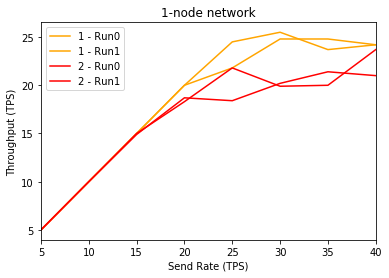

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import os

DATA = "./results/performance_summary.csv"
df = pd.read_csv(DATA)
print(df.head(5))

netsizes = df["Network Size"].unique()
repeats = df["Run Index"].unique()
print(netsizes)
print(repeats)

for size in netsizes:
    for run in repeats:
        subset = df[df['Network Size'] == size]
        subset = subset[subset['Run Index'] == run]
        ax = subset.plot(x="Send Rate (tps)", y="Throughput (tps)", label="1 - Run0", title=str(1) + "-node network", color='orange')
        break
    break
print(subset)

df1 = df[df['Network Size'] == 1]
df2 = df[df['Network Size'] == 2]
df1_0 = df1[df1['Run Index'] == 0]
df1_1 = df1[df1['Run Index'] == 1]
df2_0 = df2[df2['Run Index'] == 0]
df2_1 = df2[df2['Run Index'] == 1]


df1_1.plot(x="Send Rate (tps)", y="Throughput (tps)", ax=ax, label="1 - Run1", title=str(1) + "-node network", color='orange')
df2_0.plot(x="Send Rate (tps)", y="Throughput (tps)", ax=ax, label="2 - Run0", title=str(1) + "-node network", color='r')
df2_1.plot(x="Send Rate (tps)", y="Throughput (tps)", ax=ax, label="2 - Run1", title=str(1) + "-node network", color='r')
ax.set(xlabel="Send Rate (TPS)", ylabel="Throughput (TPS)")
#fig = ax.get_figure()
#fig.savefig("/Users/amiecorso/Desktop/exp1-" + str(netsize) + ".pdf")

plt.show()
